## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sts
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(500)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
495,a366,Stelasyn,Female,16,29,5,48.951368,0
496,a366,Stelasyn,Female,16,29,10,53.523990,0
497,a366,Stelasyn,Female,16,29,15,55.265582,0
498,a366,Stelasyn,Female,16,29,20,57.285987,0


In [2]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].value_counts()
mouse_count.count()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.groupby('Mouse ID').count()
merge_df['combo'] = merge_df["Mouse ID"] + merge_df["Timepoint"].astype(str)
merge_df.groupby('combo').count().sort_values("Mouse ID", ascending=False).head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
combo,,,,,,,,
g9895,2,2,2,2,2,2,2,2
g98920,2,2,2,2,2,2,2,2
g98915,2,2,2,2,2,2,2,2
g98910,2,2,2,2,2,2,2,2
g9890,2,2,2,2,2,2,2,2
a2030,1,1,1,1,1,1,1,1
q6330,1,1,1,1,1,1,1,1
q61025,1,1,1,1,1,1,1,1
q61030,1,1,1,1,1,1,1,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = merge_df[~merge_df.combo.str.contains("g989")]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combo
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = df["Mouse ID"].value_counts()
mouse_count2.count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_groups = df.groupby('Drug Regimen')

avg_tumor = drug_groups["Tumor Volume (mm3)"].mean()
med_tumor = drug_groups["Tumor Volume (mm3)"].median()
var_tumor = drug_groups["Tumor Volume (mm3)"].var()
std_tumor = drug_groups["Tumor Volume (mm3)"].std()
sem_tumor = drug_groups["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumorvol_summary_table = pd.DataFrame()
tumorvol_summary_table["Mean Tumor Volume"] = avg_tumor
tumorvol_summary_table["Median Tumor Volume"] = med_tumor
tumorvol_summary_table["Variance of Tumor Volume"] = var_tumor
tumorvol_summary_table["St. Deviation of Tumor Volume"] = std_tumor
tumorvol_summary_table["St. Error Tumor Volume"] = sem_tumor

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorvol_summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,St. Deviation of Tumor Volume,St. Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_groups.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combo
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


## Bar and Pie Charts

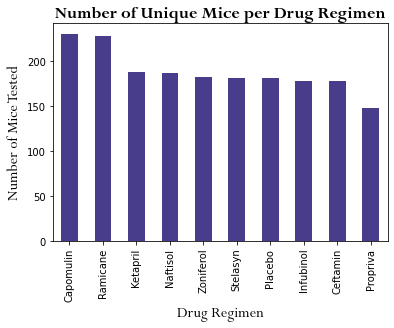

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
df["Drug Regimen"].value_counts().plot(kind = "bar", color="darkslateblue")
plt.title("Number of Unique Mice per Drug Regimen", fontsize=18, fontweight="bold", fontname="Perpetua")
plt.xlabel('Drug Regimen', fontsize=16, fontname="Perpetua")
plt.ylabel("Number of Mice Tested", fontsize=16, fontname="Perpetua")
plt.show()

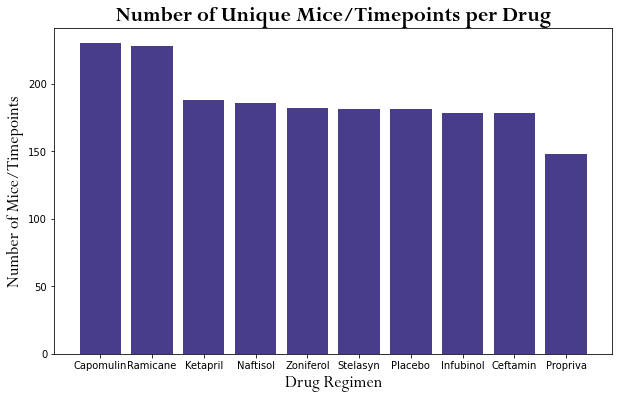

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
data = df["Drug Regimen"].value_counts()

x = data.index
y = data.values

plt.figure(figsize=(10,6))
plt.bar(x, y, color="darkslateblue")

plt.title("Number of Unique Mice/Timepoints per Drug", fontsize=22, fontweight="bold", fontname="Perpetua")
plt.xlabel('Drug Regimen', fontsize=18, fontname="Perpetua")
plt.ylabel("Number of Mice/Timepoints", fontsize=18, fontname="Perpetua")
plt.show()

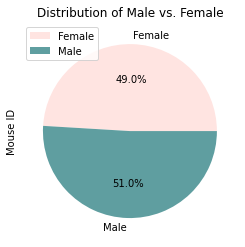

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df.groupby("Sex")["Mouse ID"].count().plot(kind="pie",colors=['mistyrose','cadetblue'],autopct="%1.1f%%")
plt.legend(loc='upper left')
plt.title('Distribution of Male vs. Female')
plt.show()

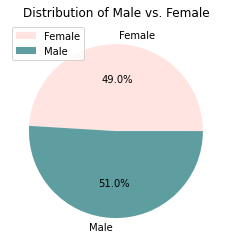

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = df.groupby("Sex")["Mouse ID"].count()
genders = list(gender_data.index)
plt.pie(df.groupby("Sex")['Mouse ID'].count(),labels=genders,colors=['mistyrose','cadetblue'],autopct="%1.1f%%")
plt.legend(loc='upper left')
plt.title('Distribution of Male vs. Female')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

df_new = df.loc[df["Drug Regimen"].isin(regimens)].reset_index(drop=True)
df_new.groupby("Mouse ID").max()

max_mouse = df_new.groupby("Mouse ID").Timepoint.max().reset_index()
max_mouse

df_regimen2 =  pd.DataFrame()

for indx, row in max_mouse.iterrows():
    mask = ((df_new["Mouse ID"] == row["Mouse ID"]) & (df_new["Timepoint"] == row["Timepoint"]))
    found = df_new.loc[mask]
    df_regimen2 = df_regimen2.append(found)
    
df_regimen2 = df_regimen2.reset_index(drop=True)
df_regimen2

df_regimen = df_new.merge(max_mouse, on=["Mouse ID", "Timepoint"])
df_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combo
0,k403,Ramicane,Male,21,16,45,22.050126,1,k40345
1,s185,Capomulin,Female,3,17,45,23.343598,1,s18545
2,x401,Capomulin,Female,16,15,45,28.484033,0,x40145
3,m601,Capomulin,Male,22,17,45,28.430964,1,m60145
4,g791,Ramicane,Male,11,16,45,29.128472,1,g79145


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds   
drug_data = []

for drugs in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    found = df_regimen.loc[df_regimen["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = found.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(drugs)
    print()
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    print()
    print()

    drug_data.append(found.values)   

Capomulin

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin

The lower quartile o

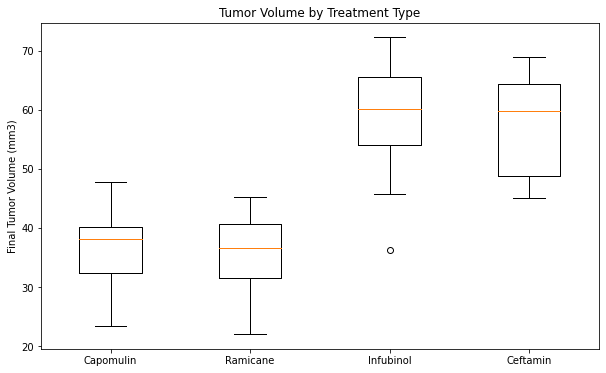

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,6))
plt.boxplot(drug_data, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title('Tumor Volume by Treatment Type')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

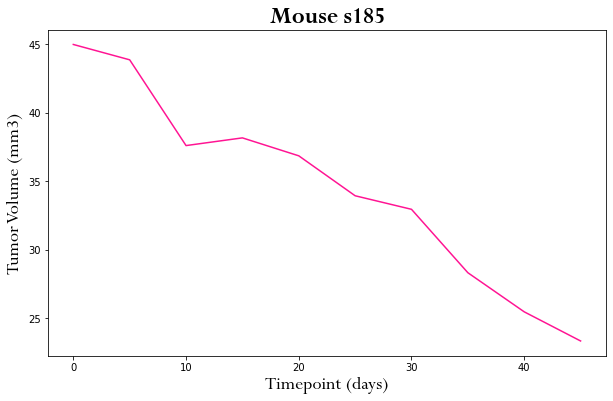

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_regimen.head()
#Found a mouse on Mouse ID s185 using the above code
mouse = df.loc[df['Mouse ID'] == "s185"].reset_index(drop=True)
mouse

plt.figure(figsize=(10,6))

x = mouse.Timepoint
y = mouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="deeppink")

plt.title("Mouse s185", fontsize=24, fontweight="bold", fontname="Perpetua")
plt.xlabel('Timepoint (days)', fontsize=20, fontname="Perpetua")
plt.ylabel("Tumor Volume (mm3)", fontsize=20, fontname="Perpetua")

plt.show()

<ipython-input-18-2cd35006959b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tumor_weight_df = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


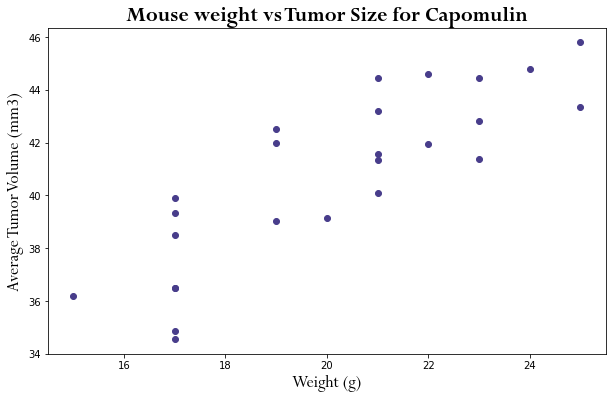

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight_df = df.loc[df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()
tumor_weight_df.head()

plt.figure(figsize=(10,6))

plt.scatter(tumor_weight_df["Weight (g)"], tumor_weight_df["Tumor Volume (mm3)"], color = "darkslateblue")
plt.title("Mouse weight vs Tumor Size for Capomulin", fontsize=22, fontweight="bold", fontname = "Perpetua")
plt.xlabel("Weight (g)", fontsize = 18, fontname = "perpetua")
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 18, fontname = "perpetua")

plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_weight_df.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [20]:
sts.pearsonr(tumor_weight_df["Weight (g)"], tumor_weight_df["Tumor Volume (mm3)"])

(0.8419363424694718, 1.3225722434712687e-07)

In [21]:
feature = tumor_weight_df["Weight (g)"]
target = tumor_weight_df["Tumor Volume (mm3)"]

y = 0.95x + 21.55


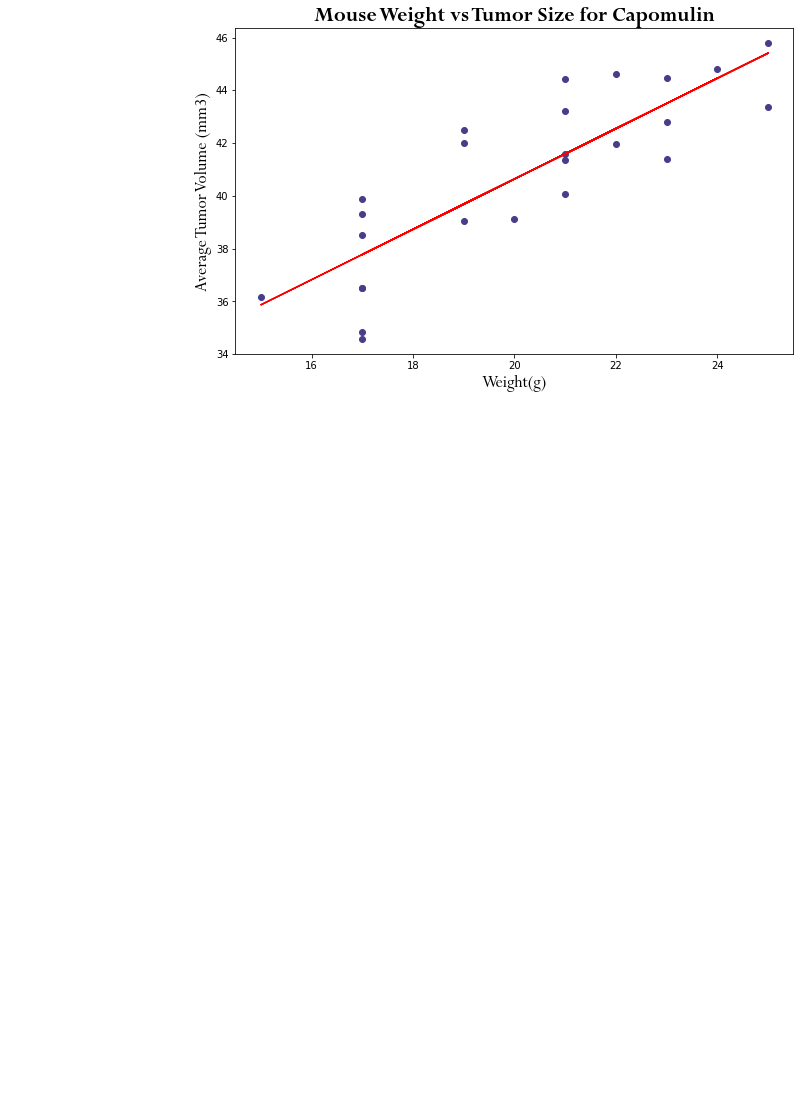

In [22]:
# Add the linear regression equation and line to plot
x_values = feature
y_values = target

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

plt.figure(figsize=(10,6))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values, color = "darkslateblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,6),fontsize=15,color="red")
plt.xlabel('Weight(g)',fontsize = 18, fontname = "perpetua")
plt.ylabel('Average Tumor Volume (mm3)',fontsize = 18, fontname = "perpetua")
plt.title("Mouse Weight vs Tumor Size for Capomulin", fontsize=22, fontweight="bold", fontname = "Perpetua")
plt.show()